# Proyek Klasifikasi Gambar
- **Nama:** Rasya Radja
- **Email:** rasya.radja12@gmail.com

Proyek Ini Dibuat menggunakan dataset: https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip

In [23]:
# Import library yang diperlukan
import math
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import os
import shutil
import tensorflow as tf
import zipfile
from google.colab import files
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, Input

%matplotlib inline

In [2]:
# Download dan extract dataset
!wget https://github.com/dicodingacademy/assets/releases/download/release/rockpaperscissors.zip
!unzip rockpaperscissors.zip

Streaming output truncated to the last 5000 lines.
  inflating: rockpaperscissors/scissors/KNNsNhduqSfuqEK5.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._KNNsNhduqSfuqEK5.png  
  inflating: rockpaperscissors/scissors/xAnfzBYnsnuru9Nf.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._xAnfzBYnsnuru9Nf.png  
  inflating: rockpaperscissors/scissors/caj9PiWZ2BenuxXF.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._caj9PiWZ2BenuxXF.png  
  inflating: rockpaperscissors/scissors/5CzwWCDnxKOJz5T0.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._5CzwWCDnxKOJz5T0.png  
  inflating: rockpaperscissors/scissors/7dBQ0fOpCs03OmnR.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._7dBQ0fOpCs03OmnR.png  
  inflating: rockpaperscissors/scissors/DXQaN15KphkE4i7z.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._DXQaN15KphkE4i7z.png  
  inflating: rockpaperscissors/scissors/0CSaM2vL2cWX6Cay.png  
  inflating: __MACOSX/rockpaperscissors/scissors/._0CSaM2vL2cWX6

In [3]:
# Set up directories
base_dir = 'rockpaperscissors'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

In [4]:
# Membuat direktori train dan validation
os.makedirs(train_dir, exist_ok=True)
os.makedirs(validation_dir, exist_ok=True)

In [5]:
# Fungsi untuk memindahkan file
def move_files(src_folder, dst_folder, split_ratio=0.6):
    files = os.listdir(src_folder)
    num_files = len(files)
    num_train = int(num_files * split_ratio)

    for i, file in enumerate(files):
        src = os.path.join(src_folder, file)
        if i < num_train:
            dst = os.path.join(train_dir, os.path.basename(src_folder), file)
        else:
            dst = os.path.join(validation_dir, os.path.basename(src_folder), file)
        os.makedirs(os.path.dirname(dst), exist_ok=True)
        shutil.move(src, dst)

# Memindahkan file ke direktori train dan validation
for folder in ['rock', 'paper', 'scissors']:
    move_files(os.path.join(base_dir, folder), train_dir)

Menyiapkan struktur folder yang terorganisir untuk dataset yang akan digunakan dalam proses training dan validation model.

In [6]:
# Menyiapkan augmentasi gambar dan normalisasi
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1./255)

- Augmentasi gambar membantu meningkatkan jumlah data pelatihan dan mencegah overfitting.
- Normalisasi gambar membantu percepatan dan stabilitas pelatihan model.

In [27]:
# Menyiapkan generator untuk train dan validation
batch_size = 32
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1312 images belonging to 3 classes.
Found 876 images belonging to 3 classes.


- train_generator dan validation_generator merupakan objek yang dihasilkan dari ImageDataGenerator.
- Mereka berfungsi untuk menghasilkan batch gambar dan label secara berkelanjutan, baik untuk training maupun validation.
- Dengan adanya generator ini, model dapat dilatih dengan data yang lebih kaya dan beragam, serta dapat divalidasi dengan data yang belum pernah dilihat sebelumnya.
- Hal ini akan menghasilkan model yang lebih baik dan lebih akurat dalam melakukan klasifikasi gambar rock, paper, dan scissors.

In [11]:
# Create the model
model = Sequential([
    Input(shape=(150, 150, 3)),  # Specify the input shape here
    Conv2D(32, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(3, activation='softmax')  # 3 classes: rock, paper, scissors
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 148, 148, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 74, 74, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 72, 72, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 36, 36, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 34, 34, 64)          │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 17, 17, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 18496)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │       1,183,808 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 3)                   │             195 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,240,323 (4.73 MB)

 Trainable params: 1,240,323 (4.73 MB)

 Non-trainable params: 0 (0.00 B)

- Model yang dibuat menggunakan arsitektur CNN (Convolutional Neural Network)
yang terdiri dari beberapa lapisan konvolusi, max pooling, flattening, dense, dan dropout.
- Lapisan konvolusi dan max pooling digunakan untuk mengekstrak fitur-fitur penting dari gambar.
- Lapisan flattening digunakan untuk mengubah output dari lapisan konvolusi menjadi vektor satu dimensi.
- Lapisan dense digunakan untuk melakukan klasifikasi berdasarkan fitur-fitur yang telah diekstrak.
- Lapisan dropout digunakan untuk mencegah overfitting.
- Model dikompilasi dengan menggunakan optimizer 'adam', loss function 'categorical_crossentropy', dan metric 'accuracy'.
- Optimizer 'adam' merupakan optimizer yang umum digunakan untuk pelatihan model deep learning.
- Loss function 'categorical_crossentropy' digunakan untuk mengukur kesalahan model dalam melakukan klasifikasi multi-kelas.
- Metric 'accuracy' digunakan untuk mengukur kinerja model dalam melakukan klasifikasi yang benar.

In [13]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=100,
    epochs=15,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/15


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


 40/100 ━━━━━━━━━━━━━━━━━━━━ 12s 210ms/step - accuracy: 0.3363 - loss: 1.1245

/usr/lib/python3.10/contextlib.py:153: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 123ms/step - accuracy: 0.3568 - loss: 1.1142 - val_accuracy: 0.4144 - val_loss: 1.0665
Epoch 2/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 14s 101ms/step - accuracy: 0.4310 - loss: 1.0639 - val_accuracy: 0.6164 - val_loss: 0.9797
Epoch 3/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 102ms/step - accuracy: 0.4842 - loss: 1.0167 - val_accuracy: 0.6221 - val_loss: 0.9431
Epoch 4/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 106ms/step - accuracy: 0.4822 - loss: 1.0220 - val_accuracy: 0.6952 - val_loss: 0.8948
Epoch 5/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 13s 112ms/step - accuracy: 0.5051 - loss: 0.9831 - val_accuracy: 0.6107 - val_loss: 0.8780
Epoch 6/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 20s 107ms/step - accuracy: 0.5541 - loss: 0.9308 - val_accuracy: 0.8790 - val_loss: 0.5505
Epoch 7/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 22s 126ms/step - accuracy: 0.6773 - loss: 0.7499 - val_accuracy: 0.8813 - val_loss: 0.4115
Epoch 8/15
100/100 ━━━━━━━━━━━━━━━━━━━━ 12s 105ms/step - accuracy: 0.7385 - loss: 0.6344 - val

In [14]:
# Evaluate the model
test_loss, test_acc = model.evaluate(validation_generator, steps=50)
print('Test accuracy:', test_acc)

50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step - accuracy: 0.9798 - loss: 0.0888
Test accuracy: 0.9783105254173279


- Model dilatih dengan menggunakan data dari train_generator selama 15 epoch, dengan setiap epoch melakukan 100 langkah pelatihan
- Setelah pelatihan selesai, model dievaluasi menggunakan data dari validation_generator, dan menghasilkan akurasi sebesar 0.9783105254173279

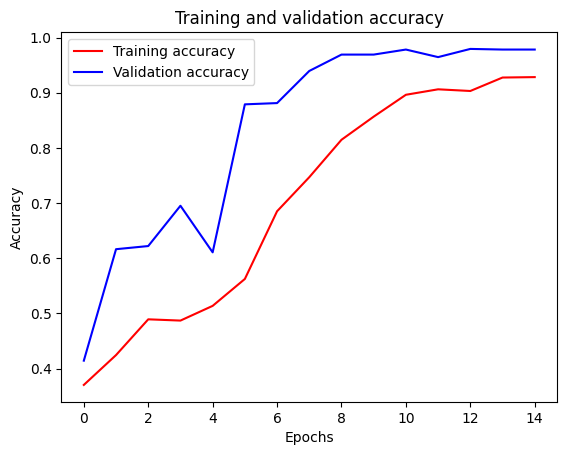

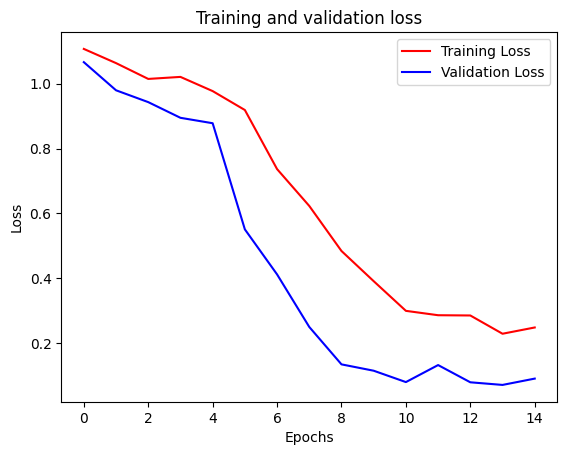

In [16]:
# Plot training history

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

- Grafik akurasi pelatihan dan validasi menunjukkan bahwa model mengalami peningkatan akurasi selama pelatihan, baik pada data pelatihan maupun validasi.
- Namun, terdapat sedikit perbedaan antara akurasi pelatihan dan validasi, yang menunjukkan kemungkinan adanya sedikit overfitting.
- Grafik loss pelatihan dan validasi menunjukkan bahwa loss model terus menurun selama pelatihan, baik pada data pelatihan maupun validasi.
- Hal ini menunjukkan bahwa model semakin baik dalam mempelajari pola dan prediksi yang benar dari data.

Secara keseluruhan, model memiliki performa yang baik, ditandai dengan akurasi yang tinggi dan loss yang rendah, serta tidak mengalami overfitting yang signifikan.

### Memprediksi Model Data dengan Upload Gambar

Saving 04l5I8TqdzF9WDMJ.png to 04l5I8TqdzF9WDMJ.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
[[1. 0. 0.]]
0
Filename: 04l5I8TqdzF9WDMJ.png
Gambar yang ditunjukan adalah kertas


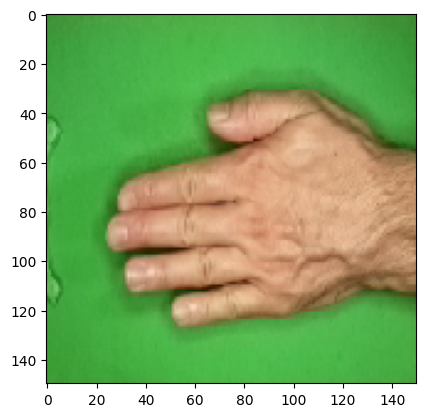

In [26]:
# Upload File Function
uploaded = files.upload()

for fn in uploaded.keys():

  # prediksi gambar
  path = fn
  img = image.load_img(path, target_size=(150,150))

  imgplot = plt.imshow(img)
  x = image.img_to_array(img)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])

  classes = model.predict(images, batch_size=10)
  predicted_label = model.predict(images).argmax()
  print(classes)
  print(predicted_label)
  print('Filename: '+ fn)

  # Cek kondisi untuk prediksi kategori kelas
  if (predicted_label) ==0:
    print('Gambar yang ditunjukan adalah kertas')
  elif (predicted_label ==1):
    print('Gambar yang ditunjukan adalahi Batu')
  elif (predicted_label ==2):
    print('Gambar yang ditunjukan adalah Gunting')

Kode ini memungkinkan pengguna untuk mengunggah gambar dan memprediksi kategori gambar tersebut (kertas, batu, atau gunting) menggunakan model yang telah dilatih. Model akan memproses gambar yang diunggah, kemudian menghasilkan prediksi kelas dan menampilkan hasilnya kepada pengguna